In [39]:
# import the required packages
import torch
import argparse
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

from torchvision.utils import make_grid

from torch.utils.tensorboard import SummaryWriter
import datetime
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.tensorboard import SummaryWriter
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from tqdm.notebook import tqdm
import seaborn as sns
import random
from tqdm import tqdm


from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split


import torch
import torchvision.models as models
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.transforms import transforms
from torchvision.utils import make_grid
import torch.nn.functional as F

from torchsummary import summary
import glob 
import shutil
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


import matplotlib
matplotlib.rcParams['axes.grid'] = False

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
# batch_size = 16

device(type='cuda')

# Data Analysis

In [41]:
import os
from collections import defaultdict

def count_images_by_class(directory):
    class_counts = defaultdict(int)

    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            class_label = filename.split('_')[0]  # Extract '001' from '001_IMG_0008.jpg'
            class_counts[class_label] += 1

    return dict(class_counts)

# Path to your image folder
folder_path = "/kaggle/input/crop-muzzle-cattle1-300/crops/Muzzle"

# Get class-wise image counts
class_distribution = count_images_by_class(folder_path)

# Print results
for label, count in sorted(class_distribution.items()):
    print(f"Class {label}: {count} images")

Class 001: 9 images
Class 002: 7 images
Class 003: 7 images
Class 024: 8 images
Class 026: 8 images
Class 027: 7 images
Class 031: 8 images
Class 032: 8 images
Class 036: 7 images
Class 037: 7 images
Class 039: 7 images
Class 040: 7 images
Class 043: 9 images
Class 044: 7 images
Class 045: 7 images
Class 047: 8 images
Class 048: 8 images
Class 049: 7 images
Class 050: 7 images
Class 051: 9 images
Class 052: 7 images
Class 054: 7 images
Class 055: 9 images
Class 061: 7 images
Class 062: 7 images
Class 063: 10 images
Class 064: 7 images
Class 065: 11 images
Class 066: 8 images
Class 068: 7 images
Class 069: 7 images
Class 070: 7 images
Class 071: 7 images
Class 072: 11 images
Class 073: 10 images
Class 075: 7 images
Class 077: 9 images
Class 078: 7 images
Class 080: 8 images
Class 081: 8 images
Class 082: 8 images
Class 094: 5 images
Class 095: 8 images
Class 096: 14 images
Class 097: 8 images
Class 098: 7 images
Class 099: 15 images
Class 100: 10 images
Class 101: 7 images
Class 102: 8 

This shows the distribution of all the folders. Only a fraction of the labels were shown for eligibility

# Data Splitting

In [42]:
import os
import random
import shutil
from collections import defaultdict

# Parameters
test_percentage = 30
parent_dir_path = "/kaggle/input/crop-muzzle-cattle1-300/crops/Muzzle"
train_dir_path  = "/kaggle/working/train"
test_dir_path   = "/kaggle/working/test"

# Ensure base output dirs exist
os.makedirs(train_dir_path, exist_ok=True)
os.makedirs(test_dir_path, exist_ok=True)

# Group images by class prefix from filename
classwise_files = defaultdict(list)
for filename in os.listdir(parent_dir_path):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        class_label = filename.split('_')[0]  # '001_IMG_1234.jpg' -> '001'
        classwise_files[class_label].append(filename)

# Perform 70/30 split and copy
for class_label, files in classwise_files.items():
    random.shuffle(files)
    split_idx = int(len(files) * (1 - test_percentage / 100.0))
    train_imgs = files[:split_idx]
    test_imgs  = files[split_idx:]

    # Create class subfolders in train and test
    train_class_dir = os.path.join(train_dir_path, class_label)
    test_class_dir  = os.path.join(test_dir_path, class_label)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy files
    for img in train_imgs:
        shutil.copy2(os.path.join(parent_dir_path, img), os.path.join(train_class_dir, img))
    for img in test_imgs:
        shutil.copy2(os.path.join(parent_dir_path, img), os.path.join(test_class_dir, img))

print("✅ Dataset split completed: 70% train, 30% test per class.")


✅ Dataset split completed: 70% train, 30% test per class.


In [43]:
train_files = len(os.listdir("/kaggle/working/train"))
print(f"The number of files in the train directory are {train_files}")

The number of files in the train directory are 272


In [44]:
test_files = len(os.listdir("/kaggle/working/test"))
print(f"The number of files in the test directory are {test_files}")

The number of files in the test directory are 272


In [45]:
import os
import shutil

src = "/kaggle/input/crop-muzzle-cattle1-300/crops/Muzzle"
dest = "/kaggle/working/Full"

# Ensure destination root exists
os.makedirs(dest, exist_ok=True)

# Loop through all files in source
for filename in os.listdir(src):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        class_label = filename.split('_')[0]  # e.g., '001' from '001_IMG_0008.jpg'

        # Create class folder inside dest
        class_dir = os.path.join(dest, class_label)
        os.makedirs(class_dir, exist_ok=True)

        # Copy the file to its class folder
        src_path = os.path.join(src, filename)
        dst_path = os.path.join(class_dir, filename)
        shutil.copy2(src_path, dst_path)

print("✅ All images copied to /kaggle/working/Full with class-wise folders.")


✅ All images copied to /kaggle/working/Full with class-wise folders.


In [46]:
import os
import cv2
import numpy as np

def preprocessing_images(src, dest):
    # Ensure destination directory exists
    os.makedirs(dest, exist_ok=True)

    # List of images
    image_list = os.listdir(src)

    for image in image_list:
        src_path = os.path.join(src, image)

        # Read the image
        img = cv2.imread(src_path)
        if img is None:
            print(f"⚠️ Could not read {image}, skipping.")
            continue

        # Gaussian Blur
        filtered_img = cv2.GaussianBlur(img, (5, 5), sigmaX=1.5)

        # Convert to grayscale
        img_gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Resize
        resized_img = cv2.resize(img_gray, (300, 300))

        # Histogram Equalization
        equalized_img = cv2.equalizeHist(resized_img)

        # Normalize to 0-255 for saving as uint8
        normalized_img = cv2.normalize(equalized_img, None, 0, 255, cv2.NORM_MINMAX)
        normalized_img = normalized_img.astype(np.uint8)

        # Save to destination
        dest_path = os.path.join(dest, image)
        cv2.imwrite(dest_path, normalized_img)

    print("✅ Preprocessing complete. All images saved to:", dest)


However, instead of using this preprocessing, we used data transformations/augmentation instead in torch.

In [47]:
dest

'/kaggle/working/Full'

Old comment: Normalization not yet successful Update: Successful, but Colab's imshow still reads the upper bound as 255 instead of 1.

Extract csv files for train and test set. This is used during training so we don't have to do the extraction again

In [48]:
import os
import pandas as pd

root_path = "/kaggle/working/"
train_path = os.path.join(root_path, "train")
csv_path = os.path.join(root_path, 'train_dataset.csv')

train_df = pd.DataFrame(columns=['image_id', 'label'])

i = 0
for class_folder in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_folder)
    if os.path.isdir(class_dir):
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_folder, image_file)  # Relative path
            train_df.loc[i] = [image_path, class_folder]         # Label from folder name
            i += 1

# Save to CSV
train_df.to_csv(csv_path, index=False)
print(f"✅ Saved {i} entries to {csv_path}")
train_df.head()


✅ Saved 2248 entries to /kaggle/working/train_dataset.csv


,image_id,label
0,307/307_IMG_3045.jpg,307
1,307/307_IMG_3041.jpg,307
2,307/307_IMG_3038.jpg,307
3,307/307_IMG_3044.jpg,307
4,307/307_IMG_3046.jpg,307


In [49]:
import os
import pandas as pd

root_path = "/kaggle/working/"
test_path = os.path.join(root_path, "test")
csv_path = os.path.join(root_path, 'test_dataset.csv')

test_df = pd.DataFrame(columns=['image_id', 'label'])
i = 0

# Loop over class folders
for class_folder in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_folder)
    if os.path.isdir(class_dir):
        for image_file in os.listdir(class_dir):
            rel_path = os.path.join(class_folder, image_file)  # e.g., "001/001_IMG_1234.jpg"
            test_df.loc[i] = [rel_path, class_folder]          # label is folder name
            i += 1

# Save to CSV
test_df.to_csv(csv_path, index=False)
print(f"✅ Saved {i} entries to {csv_path}")
test_df.head()


✅ Saved 1446 entries to /kaggle/working/test_dataset.csv


,image_id,label
0,307/307_IMG_3041.jpg,307
1,307/307_IMG_3038.jpg,307
2,307/307_IMG_3048.jpg,307
3,307/307_IMG_3047.jpg,307
4,307/307_IMG_3040.jpg,307


In [50]:
print(train_df.shape[0])

2248


In [51]:

root_path = "/kaggle/working/"
train_csv = os.path.join(root_path, 'train_dataset.csv')
train_df = pd.read_csv(train_csv) # todo; already existing

train_df.head()

,image_id,label
0,307/307_IMG_3045.jpg,307
1,307/307_IMG_3041.jpg,307
2,307/307_IMG_3038.jpg,307
3,307/307_IMG_3044.jpg,307
4,307/307_IMG_3046.jpg,307


In [52]:
train_df.shape[0]

2248

In [53]:
def correct_label(label):
  if len(str(label)) == 3:
    return "0" + str(label)
  else:
    return str(label)
      
train_df["label"] = train_df["label"].apply(correct_label)

In [54]:
test_csv = os.path.join(root_path, 'test_dataset.csv')
test_df = pd.read_csv(test_csv) 

test_df.head()

,image_id,label
0,307/307_IMG_3041.jpg,307
1,307/307_IMG_3038.jpg,307
2,307/307_IMG_3048.jpg,307
3,307/307_IMG_3047.jpg,307
4,307/307_IMG_3040.jpg,307


In [55]:
test_df["label"] = test_df["label"].apply(correct_label)

In [56]:
train_unique_labels = train_df.label.unique()
len(train_unique_labels) 

271

In [57]:
# concatenate the two dataframes vertically
df = pd.concat([train_df, test_df])

# print the resulting concatenated dataframe
df

,image_id,label
0,307/307_IMG_3045.jpg,0307
1,307/307_IMG_3041.jpg,0307
2,307/307_IMG_3038.jpg,0307
3,307/307_IMG_3044.jpg,0307
4,307/307_IMG_3046.jpg,0307
...,...,...
1441,238/238_IMG_2216.jpg,0238
1442,238/238_IMG_2211.jpg,0238
1443,238/238_IMG_2208.jpg,0238
1444,238/238_IMG_2214.jpg,0238


In [58]:
#To perform a sort of encoding. Idx is from 1 to num_classes, class is as extracted from the dataset
idx_class_labels = {}
for ind, cattle in enumerate(df.label.unique()):
  # print(ind+1, ":", cattle)
  idx_class_labels[ind] = str(cattle)

class_idx_labels = {str(value): key for key, value in idx_class_labels.items()}



In [59]:
class_idx_labels;

In [60]:
class_idx_labels["0104"]

125

In [61]:
def encode_label(label):
    idx = class_idx_labels[str(label)] 
    return idx

## Take in idx and return the class name
def decode_target(target, text_labels=True):
    result = []
    if text_labels:
        return idx_class_labels[target]
    else:
        return target

## Show batches of images
def show_batch(dl):
    for images, labels in dl:
        # print(images)
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        # print(labels)
        break
     

print(encode_label("0104"))
print(decode_target(0))

125
0307


In [62]:
train_df = train_df.sample(frac = 1, random_state=48)
test_df = test_df.sample(frac = 1, random_state=48)

In [63]:
len(train_df)
len(test_df)

1446

In [64]:
train_df
train_df.reset_index(inplace = True) 
train_df.head()

,index,image_id,label
0,287,001/001_IMG_0012.jpg,1
1,909,099/099_IMG_0793.jpg,99
2,881,113/113_IMG_0927.jpg,0113
3,1866,274/274_IMG_2652.jpg,0274
4,999,069/069_IMG_0512.jpg,69


In [65]:
train_df["label"].iloc[0]

'1'

In [66]:
test_df.reset_index(inplace = True) 
test_df.head()


,index,image_id,label
0,654,104/104_IMG_0832.jpg,0104
1,156,286/286_IMG_2795.jpg,0286
2,677,296/296_IMG_2918.jpg,0296
3,829,327/327_IMG_3249.jpg,0327
4,928,184/184_IMG_1636.jpg,0184


In [67]:
from torch.utils.data import Dataset
from PIL import Image
import os

class Biometrics(Dataset):
    def __init__(self, df, dirc, transform=None):
        self.train_dir = dirc
        self.train_df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.train_df)
    
    def __getitem__(self, idx):
        row = self.train_df.loc[idx]
        img_id, label = row['image_id'], row['label']

        # Correct path: dirc/label/image.jpg (if img_id includes subfolder)
        img_path = os.path.join(self.train_dir, img_id)  # don't add label again
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        return img, encode_label(label)


In [68]:
from torchvision import transforms
train_data_transform = transforms.Compose([
                                transforms.Resize(size=(300, 300)),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
                                transforms.RandomRotation(20),
                                transforms.GaussianBlur(kernel_size=(5,5), sigma=(0.1, 2.0)),
                                transforms.ToTensor(),
                                ])

test_data_transform = transforms.Compose([
                                transforms.Resize(size=(300, 300)),
                                transforms.ToTensor(),
                                ])

In [69]:
train_ds = Biometrics(train_df, dest, train_data_transform)
test_ds = Biometrics(test_df, dest, test_data_transform)
print(len(train_ds), len(test_ds))

2248 1446


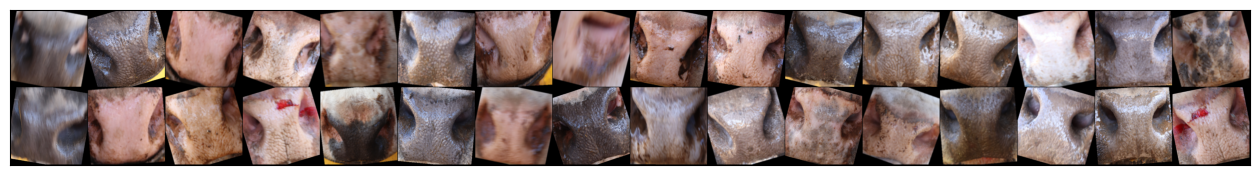

In [70]:
from PIL import Image
from torch.utils.data import DataLoader
batch_size = 32
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size, shuffle=False, num_workers=2, pin_memory=True)
show_batch(train_dl)

In [71]:
num_classes = len(class_idx_labels)

In [72]:
num_classes
     

272

In [73]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds==labels).item() / len(preds))

class MulticlassClassifierBase(nn.Module):
    def training_step(self, batch):
        img, label = batch
        out = self(img)
        loss = criterion(out, label)
        accu = accuracy(out, label)
        return accu ,loss

    def validation_step(self, batch):
        img, label = batch
        out = self(img)
        loss = criterion(out, label)
        accu = accuracy(out, label)
        return {"val_loss": loss.detach(), "val_acc": accu}
    
    def validation_epoch_ends(self, outputs):
        batch_loss = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {"val_loss":epoch_loss.item(), "val_acc":epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}],train_accu: {:.4f}, learning_rate: {:.4f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch,result['train_accu'], result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))
     

In [74]:
#VGG-16
# class AnimalBiometrics_Model(MulticlassClassifierBase):
#     def __init__(self):
#         super().__init__()
#         self.network = models.vgg16(pretrained=True)
#         n_inputs = self.network.classifier[6].in_features
#         self.network.classifier[6] = nn.Sequential(
#                                       nn.Linear(n_inputs, 256),
#                                       nn.ReLU(),
#                                       nn.Dropout(0.5),
#                                       nn.Linear(256, num_classes),
#                                       nn.LogSoftmax(dim=1)
#                                         )
#     def forward(self, xb):
#         return self.network(xb)
    
#     def freeze(self):
#         for param in self.network.parameters():
#             param.require_grad=False
#         for param in self.network.classifier[6].parameters():
#             param.require_grad=True
#     def unfreeze(self):
#         for param in self.network.parameters():
#             param.require_grad=True

In [75]:
import torch.nn as nn
import torchvision.models as models

class AnimalBiometrics_Model(MulticlassClassifierBase):
    def __init__(self):
        super().__init__()
        # 1) Load pretrained MobileNet v2
        self.network = models.mobilenet_v2(pretrained=True)
        
        # 2) Get number of input features for the classifier head
        in_features = self.network.classifier[1].in_features
        
        # 3) Replace the head with your own
        self.network.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, xb):
        return self.network(xb)
    
    def freeze(self):
        # Freeze all params
        for param in self.network.parameters():
            param.requires_grad = False
        # Unfreeze only the new classifier head
        for param in self.network.classifier.parameters():
            param.requires_grad = True

    def unfreeze(self):
        # Unfreeze all params
        for param in self.network.parameters():
            param.requires_grad = True


#RESNET50


In [76]:
class ResNet50_Model(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        # Load pretrained ResNet50
        resnet = models.resnet50(pretrained=True)

        # Extract all layers except the final average pool and FC
        self.backbone = nn.Sequential(*list(resnet.children())[:-2])  # up to layer4
        self.pool     = nn.AdaptiveAvgPool2d((1, 1))  # global average pool
        self.flatten  = nn.Flatten()

        # Custom classifier head
        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

        # Transfer learning strategy
        self.freeze_all()                   # Freeze all conv layers
        self.unfreeze_last_blocks(n=3)     # Unfreeze last 3 blocks (47–49 as per paper)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = self.flatten(x)
        return self.classifier(x)

    def freeze_all(self):
        """
        Freezes all parameters in the backbone.
        """
        for p in self.backbone.parameters():
            p.requires_grad = False

    def unfreeze_last_blocks(self, n=3):
        """
        Unfreezes the last `n` blocks in layer4 of ResNet-50 (i.e., conv blocks 47–49).
        """
        layer4 = self.backbone[-1]  # ResNet-50's layer4 is last in the Sequential
        if isinstance(layer4, nn.Sequential):
            for block in list(layer4)[-3:]:  # last 3 blocks of layer4
                for p in block.parameters():
                    p.requires_grad = True

    def unfreeze_all(self):
        """
        Makes all layers trainable.
        """
        for p in self.parameters():
            p.requires_grad = True

In [77]:
model=ResNet50_Model(num_classes)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 190MB/s] 


In [78]:

for name, param in model.named_parameters():
    print(f"{name:<60} : {'Trainable ✅' if param.requires_grad else 'Frozen ❌'}")

backbone.0.weight                                            : Frozen ❌
backbone.1.weight                                            : Frozen ❌
backbone.1.bias                                              : Frozen ❌
backbone.4.0.conv1.weight                                    : Frozen ❌
backbone.4.0.bn1.weight                                      : Frozen ❌
backbone.4.0.bn1.bias                                        : Frozen ❌
backbone.4.0.conv2.weight                                    : Frozen ❌
backbone.4.0.bn2.weight                                      : Frozen ❌
backbone.4.0.bn2.bias                                        : Frozen ❌
backbone.4.0.conv3.weight                                    : Frozen ❌
backbone.4.0.bn3.weight                                      : Frozen ❌
backbone.4.0.bn3.bias                                        : Frozen ❌
backbone.4.0.downsample.0.weight                             : Frozen ❌
backbone.4.0.downsample.1.weight                             : F

In [79]:

#model = AnimalBiometrics_Model()

In [80]:
def try_batch(dl):
    for images, labels in dl:
        # print(images[0])  
        print(images.shape)
        out = model(images)
        print(out.shape)
        print(out[0])
        print(labels)
        break
        
try_batch(train_dl)

torch.Size([32, 3, 300, 300])
torch.Size([32, 272])
tensor([ 1.4946e-01,  8.1910e-02,  5.0065e-02,  2.8292e-01, -3.1643e-01,
         7.4207e-03,  2.9710e-01, -2.9969e-01, -6.4493e-02, -4.5432e-02,
        -3.1869e-02,  9.7728e-02, -1.9565e-01,  3.0776e-01, -2.3008e-01,
         9.6469e-02, -2.4741e-01, -3.0173e-01,  7.2669e-02,  9.6358e-02,
         1.8308e-03, -6.6447e-02, -4.2992e-02, -5.9005e-02, -2.4269e-01,
        -1.4086e-01,  2.1178e-01,  5.3417e-02, -5.4902e-01, -1.3701e-01,
         6.4365e-03, -3.8517e-02, -6.1805e-02, -1.3465e-01,  4.2668e-01,
        -4.2873e-01,  1.8403e-01,  1.0126e-01, -1.1097e-02, -8.8346e-03,
        -1.7196e-01,  2.5315e-01, -1.7240e-01,  7.9737e-02, -3.0312e-01,
        -1.3617e-01, -1.3552e-01, -3.3698e-01, -1.1281e-02, -7.5385e-02,
        -2.4422e-01, -3.2356e-02,  1.7955e-02,  2.4507e-01, -1.1539e-02,
        -1.3304e-01, -1.6454e-02,  1.2660e-01, -2.2136e-01, -1.1498e-01,
         3.7022e-01,  6.2020e-02,  1.5708e-01, -1.6329e-01,  5.2091e-02,

In [81]:
@torch.no_grad()
def evaluate(model, valid_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in valid_loader]
    return model.validation_epoch_ends(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
def fit(epochs, max_lr,  model, train_loader, valid_loader, weight_decay=0,\
                grad_clip=None,opt_func=torch.optim.SGD, max_epochs_stop=3):
  
    history = []
    valid_loss_min = np.Inf
    valid_acc_max = 0
    model_file_name = 'abc.pth'
    model_file_name2 = 'abc_max_acc.pth'
    epochs_no_improve =  0
    optimizer = opt_func(model.parameters(), lr=max_lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.1)
                         
    for epoch in range(epochs):
        model.train()
        train_loss = []
        train_accu = []
        lrs = []
        for batch in tqdm(train_loader):
            
            accu, loss = model.training_step(batch)
            train_loss.append(loss)
            train_accu.append(accu)
            loss.backward()
            ## Gradient Clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()
            
            lrs.append(get_lr(optimizer))
            
            
            
        result = evaluate(model, valid_loader)
        scheduler.step(result['val_loss'])
        ########### Early Stopping ##############                                         
        valid_loss = result['val_loss']
        valid_acc = result['val_acc']
        if valid_acc > valid_acc_max:
            torch.save(model.state_dict(), model_file_name2)
            valid_acc_max = valid_acc
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), model_file_name)
            valid_loss_min = valid_loss                                  
            epochs_no_improve = 0          
        else:
            epochs_no_improve += 1
            if epochs_no_improve > max_epochs_stop:
                result["train_loss"] = torch.stack(train_loss).mean().item()
                result["train_accu"] = torch.stack(train_accu).mean().item()
                result["lrs"] = lrs
                model.epoch_end(epoch, result)
                history.append(result)
                print("Early Stopping............................")
                return history                                
                                                 
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["train_accu"] = torch.stack(train_accu).mean().item()
        result["lrs"] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    print("VAL LOSS MIN {}".format(valid_loss_min))
    print("VAL ACC MAX {}".format(valid_acc_max))
    return history

In [82]:

def get_device():
    print(torch.cuda.is_available())
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
        
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
            
    def __len__(self):
        return len(self.dl)

In [83]:
device = get_device()
## Loading data to devide
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
## Loading model to device
model = to_device(AnimalBiometrics_Model(), device)
## lets try passing a batch to model again
try_batch(train_dl)

True


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 117MB/s] 


torch.Size([32, 3, 300, 300])
torch.Size([32, 272])
tensor([-5.9123, -5.7013, -5.5492, -5.3405, -5.4414, -5.7857, -5.4266, -5.6087,
        -5.4566, -5.6519, -5.2906, -5.5227, -5.5987, -5.7117, -5.5142, -5.9244,
        -5.5330, -5.4187, -5.5110, -5.5921, -5.6701, -5.2477, -5.7594, -5.7096,
        -5.3298, -5.3482, -5.6671, -5.5363, -5.7162, -5.6234, -5.7173, -6.0539,
        -5.5115, -5.6827, -6.0170, -5.7025, -5.7885, -6.1634, -5.5053, -5.5446,
        -5.8068, -5.7743, -5.6353, -5.7119, -5.7368, -5.7285, -5.9760, -5.8085,
        -5.4219, -5.1197, -5.8782, -5.8821, -5.1536, -5.6384, -5.7346, -5.7121,
        -5.9001, -5.7093, -5.4379, -5.3334, -5.7168, -5.7001, -5.3431, -5.3007,
        -5.5765, -5.8901, -5.6413, -5.5670, -5.6958, -5.8737, -5.6846, -5.8804,
        -5.3694, -5.9449, -5.7229, -5.5310, -5.6820, -5.6781, -5.6349, -5.7172,
        -5.6806, -5.4015, -5.3437, -5.1911, -5.7201, -5.5607, -6.0505, -5.5380,
        -5.4713, -5.5720, -5.4146, -5.7952, -5.3871, -5.4613, -5.520

In [84]:
max_epochs_stop = 20
max_lr = 1e-2
grad_clip = 0.1
weight_decay = 0
batch_size = 32
criterion = nn.CrossEntropyLoss()
epochs = 100
opt_func = torch.optim.Adam
## Evaluating with non-trained model
evaluate(model, test_dl)

{'val_loss': 5.6131792068481445, 'val_acc': 0.0020380434580147266}

In [ ]:
#for resnet50_model
model.freeze()
## Training
history = fit(epochs, max_lr, model, train_dl, test_dl, weight_decay, grad_clip, opt_func, max_epochs_stop)
torch.save(model.state_dict(),"RenNet50_weight.pt")

100%|██████████| 71/71 [00:56<00:00,  1.27it/s]


Epoch [0],train_accu: 0.0013, learning_rate: 0.0100, train_loss: 5.8018, val_loss: 5.5985, val_acc: 0.0054


100%|██████████| 71/71 [00:56<00:00,  1.27it/s]


Epoch [1],train_accu: 0.0044, learning_rate: 0.0100, train_loss: 5.6007, val_loss: 5.5935, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.28it/s]


Epoch [2],train_accu: 0.0040, learning_rate: 0.0100, train_loss: 5.5935, val_loss: 5.5914, val_acc: 0.0054


100%|██████████| 71/71 [00:56<00:00,  1.27it/s]


Epoch [3],train_accu: 0.0062, learning_rate: 0.0100, train_loss: 5.5886, val_loss: 5.5907, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.28it/s]


Epoch [4],train_accu: 0.0035, learning_rate: 0.0100, train_loss: 5.5877, val_loss: 5.5901, val_acc: 0.0054


100%|██████████| 71/71 [00:54<00:00,  1.29it/s]


Epoch [5],train_accu: 0.0048, learning_rate: 0.0100, train_loss: 5.5853, val_loss: 5.5905, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.28it/s]


Epoch [6],train_accu: 0.0062, learning_rate: 0.0100, train_loss: 5.5856, val_loss: 5.5907, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.29it/s]


Epoch [7],train_accu: 0.0040, learning_rate: 0.0100, train_loss: 5.5844, val_loss: 5.5910, val_acc: 0.0054


100%|██████████| 71/71 [00:56<00:00,  1.26it/s]


Epoch [8],train_accu: 0.0062, learning_rate: 0.0010, train_loss: 5.5757, val_loss: 5.5910, val_acc: 0.0054


100%|██████████| 71/71 [00:56<00:00,  1.26it/s]


Epoch [9],train_accu: 0.0062, learning_rate: 0.0010, train_loss: 5.5743, val_loss: 5.5910, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.28it/s]


Epoch [10],train_accu: 0.0062, learning_rate: 0.0010, train_loss: 5.5747, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.27it/s]


Epoch [11],train_accu: 0.0062, learning_rate: 0.0001, train_loss: 5.5737, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:56<00:00,  1.26it/s]


Epoch [12],train_accu: 0.0075, learning_rate: 0.0001, train_loss: 5.5720, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:54<00:00,  1.30it/s]


Epoch [13],train_accu: 0.0062, learning_rate: 0.0001, train_loss: 5.5740, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.27it/s]


Epoch [14],train_accu: 0.0062, learning_rate: 0.0000, train_loss: 5.5737, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.28it/s]


Epoch [15],train_accu: 0.0062, learning_rate: 0.0000, train_loss: 5.5727, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.29it/s]


Epoch [16],train_accu: 0.0062, learning_rate: 0.0000, train_loss: 5.5724, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.27it/s]


Epoch [17],train_accu: 0.0062, learning_rate: 0.0000, train_loss: 5.5734, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:55<00:00,  1.29it/s]


Epoch [18],train_accu: 0.0062, learning_rate: 0.0000, train_loss: 5.5723, val_loss: 5.5911, val_acc: 0.0054


100%|██████████| 71/71 [00:54<00:00,  1.29it/s]


Epoch [19],train_accu: 0.0062, learning_rate: 0.0000, train_loss: 5.5742, val_loss: 5.5911, val_acc: 0.0054


 77%|███████▋  | 55/71 [00:43<00:11,  1.37it/s]

In [ ]:
max_epochs_stop = 10
max_lr = 1e-2
grad_clip = 0.1
weight_decay = 0
batch_size = 32
criterion = nn.CrossEntropyLoss()
epochs = 100
opt_func = torch.optim.Adam
## Evaluating with non-trained model
evaluate(model, test_dl)

In [ ]:
model.freeze()
## Training
history = fit(epochs, max_lr, model, train_dl, test_dl, weight_decay, grad_clip, opt_func, max_epochs_stop)
     

In [ ]:
torch.save(model.state_dict(),"RenNet50_weight.pt")

In [ ]:
torch.save(model.state_dict(),"vgg16_model_new.pt")

In [ ]:
torch.save(model.state_dict(),"mobilenet.pt")

In [ ]:
try_batch(train_dl)

In [ ]:
evaluate(model, test_dl)

In [ ]:
model.eval()
batch_bar = tqdm(total=len(test_dl), dynamic_ncols=True, position=0, leave=False, desc='Test')

res = []
actual = []
img = []
for i, (x, label) in enumerate(test_dl):
    actual.extend(label)

    # Finish predicting on the test set.
    x = x.cuda()
    with torch.no_grad():
        outputs = model(x)

        pred_y = torch.argmax(outputs, axis=1)
        res.extend(pred_y.tolist())
        img.extend(x)
    x
    batch_bar.update()
    
batch_bar.close()

In [ ]:
13/test_df.shape[0]

In [ ]:
res[:10]

In [ ]:
res[:10]

In [ ]:
actual[:10]

In [ ]:
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# 2) Pick how many images you want to plot:
N = 16
images = img[:N]          # list of tensors (on GPU) from your loop
preds  = res[:N]          # list of ints
trues  = actual[:N]       # list of ints

# 3) Move to CPU, unnormalize, and clamp:
images = [
    im.cpu().clamp(0,1) 
    for im in images
]

# 4) Make a grid of images:
grid = torchvision.utils.make_grid(images, nrow=4, padding=2)

# 5) Plot:
plt.figure(figsize=(8,8))
plt.imshow(grid.permute(1,2,0))  # CHW -> HWC
plt.axis('off')

# 6) Annotate each cell with its labels:
#    We'll draw text manually on the same figure
nrow = 4
img_h = grid.shape[1] // nrow
img_w = grid.shape[2] // nrow

for idx in range(N):
    row = idx // nrow
    col = idx %  nrow
    x = col * (img_w + 2) + 4
    y = row * (img_h + 2) + 12
    plt.text(
        x, y,
        f"T:{trues[idx]}  P:{preds[idx]}",   # <-- straight quotes here
        color='white',
        backgroundcolor='black',
        fontsize=8
    )

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# 2) Pick how many images you want to plot:
N = 16
images = img[:N]          # list of tensors (on GPU) from your loop
preds  = res[:N]          # list of ints
trues  = actual[:N]       # list of ints

# 3) Move to CPU, unnormalize, and clamp:
images = [
    im.cpu().clamp(0,1) 
    for im in images
]

# 4) Make a grid of images:
grid = torchvision.utils.make_grid(images, nrow=4, padding=2)

# 5) Plot:
plt.figure(figsize=(8,8))
plt.imshow(grid.permute(1,2,0))  # CHW -> HWC
plt.axis('off')

# 6) Annotate each cell with its labels:
#    We'll draw text manually on the same figure
nrow = 4
img_h = grid.shape[1] // nrow
img_w = grid.shape[2] // nrow

for idx in range(N):
    row = idx // nrow
    col = idx %  nrow
    x = col * (img_w + 2) + 4
    y = row * (img_h + 2) + 12
    plt.text(
        x, y,
        f"T:{trues[idx]}  P:{preds[idx]}",   # <-- straight quotes here
        color='white',
        backgroundcolor='black',
        fontsize=8
    )

plt.show()
